In [2]:
!pip install dlib

Checks if Face is Facing towards Camera or not

In [65]:
import cv2
from google.colab.patches import cv2_imshow

def detect_face(img):
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  # Read the input image
  img = cv2.imread(img)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.1, 4)

  # Check the number of detected faces
  num_faces = len(faces)

  for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 3)
      # Print "Face" below each detected face with larger font and black color
      font = cv2.FONT_HERSHEY_SIMPLEX
      font_scale = 2.5
      font_thickness = 5
      text = "Face"
      text_size, _ = cv2.getTextSize(text, font, font_scale, font_thickness)
      text_x = x + (w - text_size[0]) // 2
      text_y = y + h + 30
      cv2.putText(img, text, (text_x, text_y), font, font_scale, (0, 0, 0), font_thickness)
  if num_faces == 1:
    cv2_imshow(img)
    return "Face is facing towards the camera."
  else:
    cv2_imshow(img)
    return "Face is not facing towards the camera."

  # Display the output using cv2_imshow

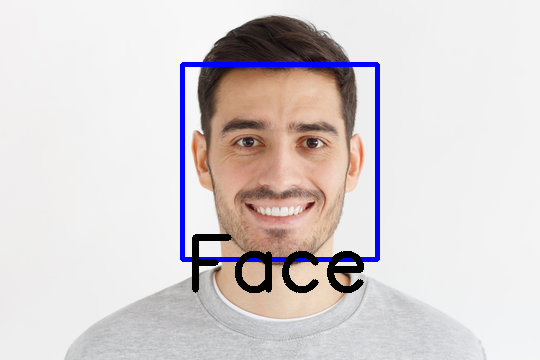

'Face is facing towards the camera.'

In [66]:
detect_face('/Sample Photos/front_face.jpg')

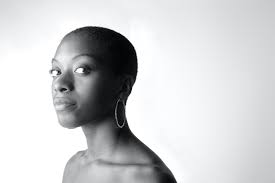

'Face is not facing towards the camera.'

In [67]:
detect_face('/Sample Photos/side_face.jpg')

Check if eyes are facing towards camera or not

In [68]:
import cv2

def detect_eyes(img):
  eye_cascade = cv2.CascadeClassifier('haarcascade_eye_tree_eyeglasses.xml')
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  img = cv2.imread(img)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.1, 4)

  eyes_detected = False

  for (x, y, w, h) in faces:
      roi_gray = gray[y:y+h, x:x+w]
      roi_color = img[y:y+h, x:x+w]
      eyes = eye_cascade.detectMultiScale(roi_gray)

      # To detect only 2 eyes, limit the loop to 2 iterations
      eye_count = 0
      for i, (ex, ey, ew, eh) in enumerate(eyes):
          if eye_count >= 2:
              break
          cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 5)

          # Print "Eye" below each detected eye with larger font and black color
          font = cv2.FONT_HERSHEY_SIMPLEX
          font_scale = 1
          font_thickness = 2
          text = "Eye"
          text_size, _ = cv2.getTextSize(text, font, font_scale, font_thickness)
          text_x = ex + (ew - text_size[0]) // 2
          text_y = ey + eh + 30
          cv2.putText(roi_color, text, (text_x, text_y), font, font_scale, (0, 0, 0), font_thickness)

          eye_count += 1

      if eye_count > 0:
          eyes_detected = True

  if eyes_detected:
    cv2_imshow(img)
    return "Eyes looking directly at the camera"
  else:
    cv2_imshow(img)
    return "Eyes not looking directly at the camera"

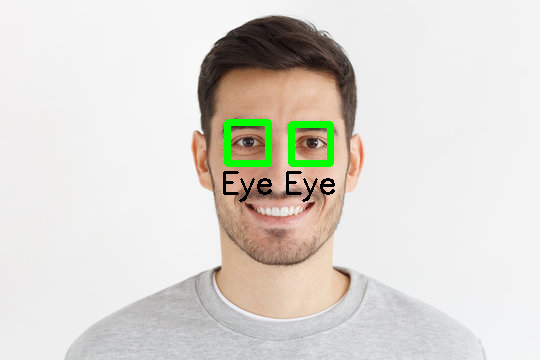

'Eyes looking directly at the camera'

In [69]:
detect_eyes('/Sample Photos/front_face.jpg')

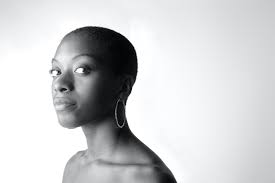

'Eyes not looking directly at the camera'

In [70]:
detect_eyes('/Sample Photos/side_face.jpg')

Check if mouth is open or closed

In [71]:
import cv2
import dlib
from google.colab.patches import cv2_imshow

def detect_mouth(img):
  # Load the pre-trained face detector from dlib
  detector = dlib.get_frontal_face_detector()

  # Load the pre-trained facial landmark predictor from dlib
  predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

  img = cv2.imread(img)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Detect faces in the image
  faces = detector(gray)

  for face in faces:
      # Get the facial landmarks for the face
      landmarks = predictor(gray, face)

      # Get the x and y coordinates of the mouth landmarks
      mouth_left = (landmarks.part(48).x, landmarks.part(48).y)
      mouth_right = (landmarks.part(54).x, landmarks.part(54).y)
      mouth_top = (landmarks.part(51).x, landmarks.part(51).y)
      mouth_bottom = (landmarks.part(57).x, landmarks.part(57).y)

      # Calculate the distance between the top and bottom of the mouth
      mouth_distance = mouth_bottom[1] - mouth_top[1]

      # Calculate the distance between the left and right edges of the mouth
      mouth_width = mouth_right[0] - mouth_left[0]

      # Define a threshold to determine if the mouth is open or closed
      mouth_open_threshold = 0.35  # You can adjust this value based on your needs

      # Check if the mouth is open or closed based on the distances
      if mouth_distance > mouth_open_threshold * mouth_width:
        cv2_imshow(img)
        return "Mouth is open."
        mouth_status = "Open"
      else:
        cv2_imshow(img)
        return "Mouth is closed."
        mouth_status = "Closed"

      # Draw a rectangle around the mouth
      cv2.rectangle(img, (mouth_left[0], mouth_top[1]), (mouth_right[0], mouth_bottom[1]), (0, 255, 0), 2)

      # Write the status (Open/Closed) below the mouth rectangle
      font = cv2.FONT_HERSHEY_SIMPLEX
      font_scale = 1
      thickness = 2
      text_size = cv2.getTextSize(mouth_status, font, font_scale, thickness)[0]
      text_x = mouth_left[0] + (mouth_width - text_size[0]) // 2
      text_y = mouth_bottom[1] + text_size[1] + 10
      cv2.putText(img, mouth_status, (text_x, text_y), font, font_scale, (0, 255, 0), thickness, cv2.LINE_AA)

  # Display the output image with the rectangle and text

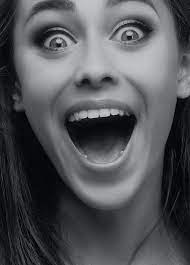

'Mouth is open.'

In [72]:
detect_mouth('/Sample Photos/open_mouth.jpg')

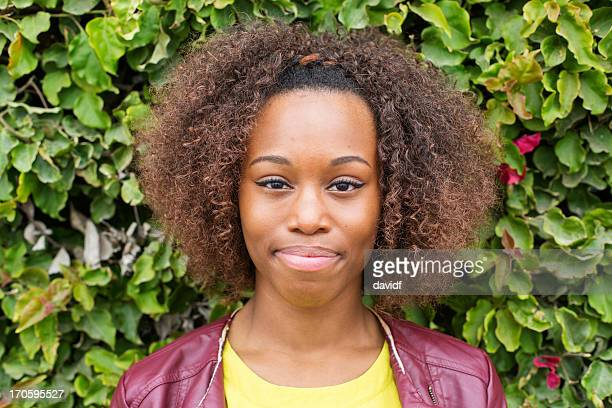

'Mouth is closed.'

In [73]:
detect_mouth('/Sample Photos/closed_mouth.jpg')

Check if smiling or not

In [74]:
import cv2

def detect_smile(image):
    image = cv2.imread(image)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        smiles = smile_cascade.detectMultiScale(roi_gray, scaleFactor=1.8, minNeighbors=20)

        # Determine if a smile is detected and draw rectangles accordingly
        if len(smiles) > 0:
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green rectangle for face
            for (sx, sy, sw, sh) in smiles:
                cv2.rectangle(image, (x + sx, y + sy), (x + sx + sw, y + sy + sh), (0, 255, 0), 2)  # Green rectangle for smile
                cv2_imshow(image)
                return "Smiling"
        else:
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Red rectangle for face
            cv2_imshow(image)
            return "Not Smiling"

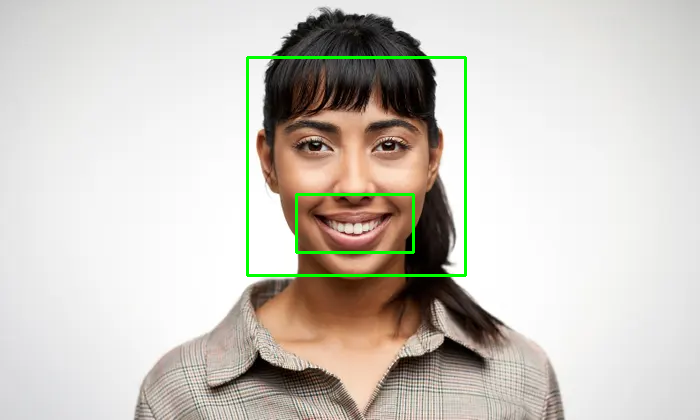

'Smiling'

In [75]:
detect_smile('/Sample Photos/smile.jpg')

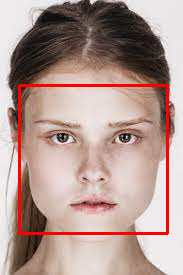

'Not Smiling'

In [76]:
detect_smile('/Sample Photos/no_smile.jpg')

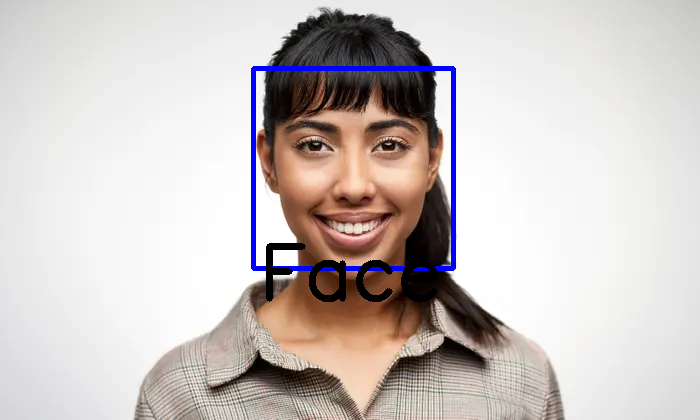

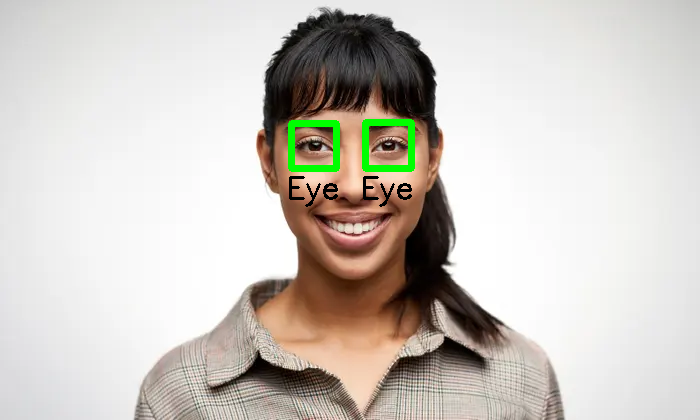

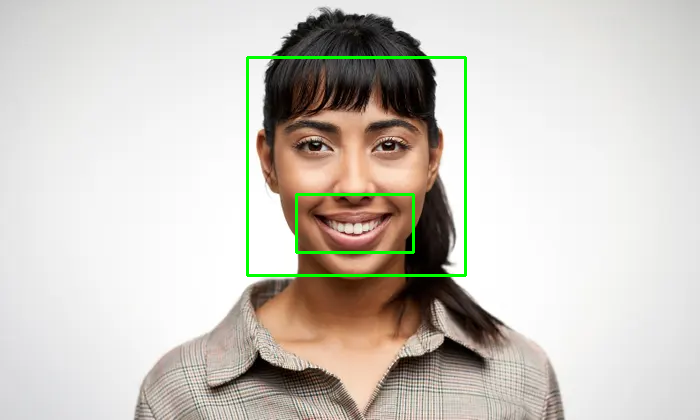

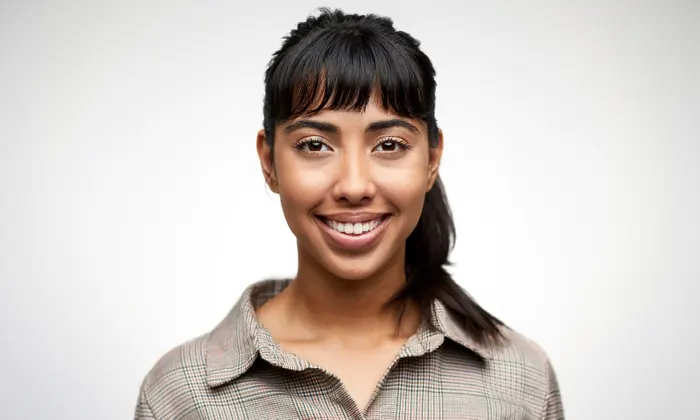

Is face facing the camera? Face is facing towards the camera.
Are eyes facing the camera? Eyes looking directly at the camera
Is the person smiling? Smiling
Is the mouth open? Mouth is open.


In [87]:
def image_pose_detector(image, detect_face_func, detect_eyes_func, detect_mouth_func, detect_smile_func):
    is_face_facing_camera = detect_face(image)
    are_eyes_facing_camera = detect_eyes(image)
    is_smiling = detect_smile(image)
    is_mouth_open = detect_mouth(image)

    return is_face_facing_camera, are_eyes_facing_camera, is_smiling, is_mouth_open

# Usage example:
# Replace the following 'image' with your actual image data
sample_image = "/Sample Photos/smile.jpg"

# Replace the following functions with your actual detection functions
result = image_pose_detector(sample_image, detect_face, detect_eyes, detect_mouth, detect_smile)

print("Is face facing the camera?", result[0])
print("Are eyes facing the camera?", result[1])
print("Is the person smiling?", result[2])
print("Is the mouth open?", result[3])